In [1]:
import pandas as pd
import sqlite3 as db

In [2]:
basic_df = pd.read_pickle(r'C:\GIT\waterstones_main\Data\books_basic.pkl')
basic_df['price'] = basic_df['price'].str.replace('£', '').astype('float64')
basic_df.drop_duplicates(inplace=True)

In [3]:
extra_df = pd.read_csv(r'C:\GIT\waterstones_main\Data\all_extra_info.csv')

extra_df.drop('Unnamed: 0', axis=1, inplace=True)
extra_df.drop('Unnamed: 0.1', axis=1, inplace=True)
extra_df.drop('index', axis=1, inplace=True)

# remove newlines and tabs
extra_df = extra_df.replace('\n','', regex=True)
extra_df = extra_df.replace('\t','', regex=True)
extra_df['weight_gram'] = extra_df['weight'].str.replace('g','')
extra_df.drop('weight', axis=1, inplace=True)
extra_df.drop_duplicates(inplace=True)

### take the useful columns to merge with extra_df

In [4]:
new = pd.DataFrame(basic_df[['price','book_format','book_link']])
df = pd.merge(left=extra_df, right=new, how="left", on=["book_link"])
df.drop(['availability','isbn','description','review_links','publisher','contributors','datePublished','book_link'], axis=1, inplace=True)

In [6]:
df

,categories,pages,num_reviews,num_stars,media_reviews,weight_gram,price,book_format
0,This book can be found in:Spirituality & Belie...,32.0,NaN,NaN,NaN,NaN,1.99,Paperback
1,"This book can be found in:Politics, Society & ...",260.0,NaN,NaN,NaN,NaN,35.00,Spiral bound
2,This book can be found in:Entertainment > Musi...,NaN,NaN,NaN,NaN,NaN,9.95,Book
3,"This book can be found in:Poetry, Drama & Crit...",311.0,NaN,NaN,NaN,562,74.75,Hardback
4,"This book can be found in:Art, Fashion & Photo...",208.0,NaN,NaN,NaN,948,37.00,Hardback
...,...,...,...,...,...,...,...,...
492714,This book can be found in:Health & Lifestyle >...,126.0,NaN,NaN,NaN,263,NaN,NaN
492715,"This book can be found in:Politics, Society & ...",276.0,NaN,NaN,NaN,499,NaN,NaN
492716,"This book can be found in:Science, Technology ...",116.0,NaN,NaN,NaN,245,NaN,NaN
492717,This book can be found in:Spirituality & Belie...,172.0,NaN,NaN,"He utilizes facts, sound science, and (no pun ...",381,NaN,NaN


### drop the nan on the selected columns

In [5]:
dropna_cols = ['categories', 'pages', 'weight_gram', 'price', 'book_format','num_reviews','num_stars']
df.dropna(subset=dropna_cols, inplace=True)

In [6]:
df[['pages','weight_gram','num_reviews','num_stars']] = df[['pages','weight_gram','num_reviews','num_stars']].astype('int64')
df.dtypes
## convert to int data type

categories        object
pages              int64
num_reviews        int64
num_stars          int64
media_reviews     object
weight_gram        int64
price            float64
book_format       object
dtype: object

In [7]:
df.categories = df.categories.astype('category')

### deal with media reviews

In [8]:
## have media reviews would be 1, without would be 0
import numpy as np
df['media_reviews'] = np.where(df['media_reviews'].isnull(), 0, 1)

### Cleaning the categories

In [19]:
df.categories.replace('This book can be found in:', '', regex=True, inplace=True)
df.categories.replace('This product can be found in:', '', regex=True, inplace=True)

In [20]:
df['categories'] = df.categories.str.split('>').str[0]  ## get the root category
df['categories'] = df['categories'].str.replace("'", "")

In [11]:
# comment here coppied from excel
cats_to_drop = ['Hobbies, quiz books & gamesPoetry, Drama & Criticism ','Hobbies, quiz books & gamesHealth & Lifestyle ','Computing & InternetSpirituality & Beliefs ','Business, Finance & LawHistory ','Biography & True StoriesCrime, Thrillers & Mystery ','Art, Fashion & PhotographyPolitics, Society & Education ','Hobbies, quiz books & gamesSports Books ','Health & LifestyleScience, Technology & Medicine ','Biography & True Stories','Computing & InternetHumour ','FictionFiction ','Politics, Society & EducationSpirituality & Beliefs ','HistoryHistory ','HistoryFiction ','Art, Fashion & PhotographyEntertainment ','Fiction','Business, Finance & LawBiography & True Stories ','HistorySpirituality & Beliefs ','Poetry, Drama & CriticismLanguage & Reference ','HistoryPolitics, Society & Education ','Toys & Games ','Politics, Society & Education','Art, Fashion & PhotographyHistory ','Transport: general interestChildrens & Teenage ','Hobbies, quiz books & gamesTransport: general interest ','Sports Books ','Hobbies, quiz books & gamesFood & Drink ','Computing & InternetBusiness, Finance & Law ','Transport: general interestHealth & Lifestyle ','Art, Fashion & PhotographyLanguage & Reference ','Hobbies, quiz books & gamesPopular Science & Nature ','Business, Finance & LawSpirituality & Beliefs ','Hobbies, quiz books & gamesLanguage & Reference ','HistoryBiography & True Stories','Health & LifestyleHealth & Lifestyle ','Transport: general interestHistory ','Computing & InternetLanguage & Reference ','Business, Finance & LawChildrens & Teenage ','Art, Fashion & Photography','Business, Finance & LawArt, Fashion & Photography ','Business, Finance & LawHealth & Lifestyle ','Hobbies, quiz books & gamesChildrens & Teenage ','Transport: general interestArt, Fashion & Photography ','Transport: general interestTransport: general interest ','Business, Finance & LawLanguage & Reference ','Language & ReferenceChildrens & Teenage','Poetry, Drama & Criticism','Health & LifestyleSports Books ','Transport: general interestScience, Technology & Medicine ','Business, Finance & LawScience, Technology & Medicine ','Health & LifestyleSports Books Art, Fashion & Photography ','Poetry, Drama & CriticismPoetry, Drama & Criticism ','Hobbies, quiz books & gamesEntertainment ','Computing & InternetScience, Technology & Medicine ','Business, Finance & Law','Art, Fashion & PhotographyArt, Fashion & Photography ','Hobbies, quiz books & gamesHumour ','Biography & True StoriesBiography & True Stories ','Politics, Society & EducationHistory','Transport: general interestBusiness, Finance & Law ','Childrens & TeenageChildrens & Teenage ','Hobbies, quiz books & gamesScience, Technology & Medicine ','Business, Finance & LawBusiness, Finance & Law ','Cultural Highlights ','Business, Finance & LawPolitics, Society & Education ','Politics, Society & EducationHistory ','Hobbies, quiz books & gamesHistory ','Childrens & Teenage','Hobbies, quiz books & gamesPolitics, Society & Education ','Politics, Society & EducationLanguage & Reference ','Hobbies, quiz books & gamesArt, Fashion & Photography ','Transport: general interest','Hobbies, quiz books & games','Stationery & Gifts ']


In [12]:
rows_to_drop = ~df.categories.isin(cats_to_drop)
df = df[rows_to_drop]   

In [13]:
df['categories'] = df['categories'].str.replace('Politics, Society & EducationPolitics, Society & Education ', 'Politics, Society & Education')

In [14]:
filt = ~(df['categories'] == '')
df = df[filt] ### remove empty string

In [15]:
df = df[df.book_format.isin(['Paperback',
'Hardback',
'Mixed media product',
'Book',
'Board book',
'Spiral bound',              
'Sheet music'])]

In [17]:
weight_outliers = (df.weight_gram > 8000)
df = df[~weight_outliers] ## this remove weight outliers

price_outliers = df.price > 2000
df = df[~price_outliers] ### this remove price outliers

In [21]:
df

,categories,pages,num_reviews,num_stars,media_reviews,weight_gram,price,book_format
1016,Biography & True Stories,264,1,5,0,308,9.99,Paperback
1288,"Science Fiction, Fantasy & Horror",424,2,3,0,490,10.99,Paperback
1346,Fiction,244,1,5,0,286,9.99,Paperback
1934,"Science Fiction, Fantasy & Horror",336,3,5,0,495,8.99,Paperback
2706,Spirituality & Beliefs,320,15,5,0,334,7.99,Paperback
...,...,...,...,...,...,...,...,...
449762,"Science Fiction, Fantasy & Horror",400,2,4,0,276,6.99,Paperback
449808,Fiction,480,1,4,0,245,9.99,Paperback
450162,Spirituality & Beliefs,264,1,5,0,327,13.50,Paperback
450307,Transport: general interest,96,1,4,0,305,14.99,Paperback


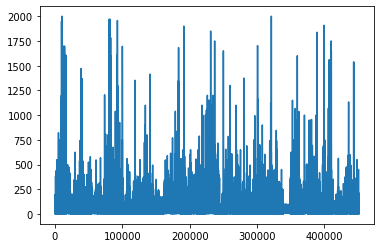

In [18]:
df.price.plot();

In [22]:
df.to_pickle('linear_project_data.pkl')